Hockey EDA Project

Author: Alyssa Weber

3/4/2023

# Milestone 1

## Project Subject

The purpose of this project is to prep, clean, and merge data from different sources including CSV, HTML, and an API. 

## Data Sources

1. CSV/Excel/PDF
- [Professional Hockey Database](https://www.kaggle.com/datasets/open-source-sports/professional-hockey-database)
    - saved "master.csv" locally
- This .csv file contains the names and biographical information of players from the NHL including:
    - name
    - nicknames
    - height
    - weight
    - Left/Right handed
    - Birth and Death Years
    - Birth Day and Month
    - Birthplace including the city and state

2. HTML
- [List of NHL Statistical Leaders](https://en.wikipedia.org/wiki/List_of_NHL_statistical_leaders)
- This HTML source includes two tables depicting All-time leaders (skaters)
- The first table is labeled regular seasion points. It includes:
    - name
    - teams
    - games played
    - Points
    - points per game
- The second table is labeled regular seasion goals. It includes:
    - name
    - teams
    - games played
    - goals
    - goals per game

3. API
- [NHL Records](https://gitlab.com/dword4/nhlapi/-/blob/master/records-api.md)
- This API discovered data by working through a JavaScript file from records.nhl.com. It includes information regarding the following categories:
   - attendance
   - draft
   - records
   - franchise
   - player
   - playoffs
   - trophy
   - milestones
   - officials

## Relationships

CSV File: Contains stats regarding NHL players listed by first name, last name, and nicknames.

Website: Contains stats regarding NHL players that are all time leaders (skaters), listed by name. 

API: Contains stats regarding NHL players. 

All 3 of these data sources are related by NHL player names. The player names are stored differently in each data type, but can be easily manipulated to create one to many relationships between the sources. 

In [1]:
# NOTE: I am rusty on API's and will need more time to explore the data

## Next Steps

The most important part of the project is going to be staying organized and making clear notes throughout the process. I am hopeful that the data cleanup in milestone two closely reflects data cleanup on both HTML and API formats. Anytime data is transformed, being able to communicate those changes is vital. 

The data in my project includes many details regarding NHL athletes including demographics and player statistics. The ethical implications involve looking into individualized data rather than whole group anonymous data. Any insight that is unveiled directly involves a specific person and the intent in which that information is shared is critical.  

Sports analysis has been around for many years. It has been used for recruiting, entertainment, trading purposes, training, etc. This project revolves more around data preparation. The goal is to be able to view data in different formats and restructure it so that it is easier to read and use. After the data is cleaned and merged, I look forward to looking into how many objects I was able to combine and what patterns come into view when looking at players from creative viewpoints. 

Challenges in this project are going to come with new territory and a learning curve that comes with that. This will be the first time I have worked with HTML data. It will also be the first time merging different data sources together. Another challenge is simply the vast amount of data. With so many columns and rows, missing data is inevitable. I will need to figure out the best way to approach the Null values before visualizing or drawing conclusions in milestone 5. 


# Milestone 2: Cleaning Flat File Source

In [2]:
# Import libraries for working with a dataframe, manipulating numerical data, and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# load flat file and read the first few rows
master_df = pd.read_csv("Master.csv")
master_df.head(3)

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,birthDay,birthCountry,birthState,birthCity,deathYear,deathMon,deathDay,deathCountry,deathState,deathCity
0,aaltoan01,NaN,NaN,Antti,Aalto,NaN,Antti,NaN,73.0,210.0,...,4.0,Finland,NaN,Lappeenranta,NaN,NaN,NaN,NaN,NaN,NaN
1,abbeybr01,NaN,NaN,Bruce,Abbey,NaN,Bruce,NaN,73.0,185.0,...,18.0,Canada,ON,Toronto,NaN,NaN,NaN,NaN,NaN,NaN
2,abbotge01,NaN,NaN,George,Abbott,NaN,George Henry,Preacher,67.0,153.0,...,3.0,Canada,ON,Synenham,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Print columns for easier reference
master_df.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear', 'deathMon', 'deathDay', 'deathCountry',
       'deathState', 'deathCity'],
      dtype='object')

## Data Cleaning: Step 1

We do not need all of the death information. I am going to leave the death Year, but deleate 'deathMon', 'deathDay', 'deathCountry', 'deathState', 'deathCity'.

In [5]:
#drop death related columns (other than the year)
master_df = master_df.drop(columns=['deathMon', 'deathDay', 'deathCountry', 'deathState', 'deathCity'])

#confirm that the columns are gone
master_df.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'ihdbID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA', 'lastWHA', 'pos',
       'birthYear', 'birthMon', 'birthDay', 'birthCountry', 'birthState',
       'birthCity', 'deathYear'],
      dtype='object')

## Data Cleaning: Step 2

All names should be converted into lowercase for easier merging of data. 

In [6]:
# lowercase columns, and check first 3 rows to check that changes were applied
master_df['firstName'] = master_df['firstName'].str.lower()
master_df['lastName'] = master_df['lastName'].str.lower()
master_df.head(3)

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,firstWHA,lastWHA,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,deathYear
0,aaltoan01,NaN,NaN,antti,aalto,NaN,Antti,NaN,73.0,210.0,...,NaN,NaN,C,1975.0,3.0,4.0,Finland,NaN,Lappeenranta,NaN
1,abbeybr01,NaN,NaN,bruce,abbey,NaN,Bruce,NaN,73.0,185.0,...,1975.0,1975.0,D,1951.0,8.0,18.0,Canada,ON,Toronto,NaN
2,abbotge01,NaN,NaN,george,abbott,NaN,George Henry,Preacher,67.0,153.0,...,NaN,NaN,G,1911.0,8.0,3.0,Canada,ON,Synenham,NaN


## Data Cleaning: Step 3

Convert dates and integer values from floating points to valeues that are easier to read

In [7]:
# understand object types
master_df.dtypes

playerID         object
coachID          object
hofID            object
firstName        object
lastName         object
nameNote         object
nameGiven        object
nameNick         object
height          float64
weight          float64
shootCatch       object
legendsID        object
ihdbID          float64
hrefID           object
firstNHL        float64
lastNHL         float64
firstWHA        float64
lastWHA         float64
pos              object
birthYear       float64
birthMon        float64
birthDay        float64
birthCountry     object
birthState       object
birthCity        object
deathYear       float64
dtype: object

In [8]:
# Understand missing values
master_df['birthYear'].isnull().value_counts()

False    7543
True      218
Name: birthYear, dtype: int64

In [9]:
# Change a float64 object in a column to an integer
# Note: .astype(int) cannot handle missing values while .astype('Int64') can
master_df['birthYear'] = master_df['birthYear'].astype('Int64')
master_df['birthYear'].head(3)

0    1975
1    1951
2    1911
Name: birthYear, dtype: Int64

In [10]:
# Change more dates in columns from floats to integers
master_df['firstNHL'] = master_df['firstNHL'].astype('Int64')
master_df['lastNHL'] = master_df['lastNHL'].astype('Int64')
master_df['firstWHA'] = master_df['firstWHA'].astype('Int64')
master_df['lastWHA'] = master_df['lastWHA'].astype('Int64')
master_df['birthMon'] = master_df['birthMon'].astype('Int64')
master_df['birthDay'] = master_df['birthDay'].astype('Int64')
master_df['deathYear'] = master_df['deathYear'].astype('Int64')

# Height, weight, and ihdbID will also be converted since they are entered as whole numbers in the original document
master_df['height'] = master_df['height'].astype('Int64')
master_df['weight'] = master_df['weight'].astype('Int64')
master_df['ihdbID'] = master_df['ihdbID'].astype('Int64')

# Print new column data types to check the changes
master_df.dtypes

playerID        object
coachID         object
hofID           object
firstName       object
lastName        object
nameNote        object
nameGiven       object
nameNick        object
height           Int64
weight           Int64
shootCatch      object
legendsID       object
ihdbID           Int64
hrefID          object
firstNHL         Int64
lastNHL          Int64
firstWHA         Int64
lastWHA          Int64
pos             object
birthYear        Int64
birthMon         Int64
birthDay         Int64
birthCountry    object
birthState      object
birthCity       object
deathYear        Int64
dtype: object

## Data Cleaning: Step 4

ihdbID is a column that I was unfamiliar with and needed to research. I will change the name of the column to an more natural title. 

In [11]:
master_df.rename(columns = {'ihdbID':'internetHockeyID'}, inplace = True)
master_df.columns

Index(['playerID', 'coachID', 'hofID', 'firstName', 'lastName', 'nameNote',
       'nameGiven', 'nameNick', 'height', 'weight', 'shootCatch', 'legendsID',
       'internetHockeyID', 'hrefID', 'firstNHL', 'lastNHL', 'firstWHA',
       'lastWHA', 'pos', 'birthYear', 'birthMon', 'birthDay', 'birthCountry',
       'birthState', 'birthCity', 'deathYear'],
      dtype='object')

## Data Cleaning: Step 5

Next, I will look for and remove outliers. 

In [12]:
# Use the describe function to quickly scan the data
master_df.describe()

,height,weight,internetHockeyID,firstNHL,lastNHL,firstWHA,lastWHA,birthYear,birthMon,birthDay,deathYear
count,7334.000000,7336.000000,7125.000000,6851.000000,6851.000000,903.000000,903.000000,7543.000000,7506.000000,7504.000000,1320.000000
mean,71.904418,189.503953,18159.395930,1979.898555,1985.173551,1974.256921,1975.746401,1955.170091,6.056088,15.605144,2547.587121
std,2.328650,18.341611,22852.778006,24.150092,24.359206,2.123774,1.947460,26.379075,3.434267,8.917103,2052.311223
min,63.000000,125.000000,45.000000,1917.000000,1917.000000,1972.000000,1972.000000,1841.000000,1.000000,1.000000,1907.000000
25%,70.000000,178.000000,3339.000000,1968.000000,1974.000000,1972.000000,1974.000000,1943.000000,3.000000,8.000000,1970.000000
50%,72.000000,190.000000,7500.000000,1985.000000,1991.000000,1974.000000,1976.000000,1961.000000,6.000000,15.000000,1989.000000
75%,73.000000,200.000000,23463.000000,1999.000000,2006.000000,1976.000000,1978.000000,1975.000000,9.000000,23.000000,2002.000000
max,81.000000,265.000000,118280.000000,2011.000000,2011.000000,1978.000000,1978.000000,1993.000000,12.000000,31.000000,9999.000000


There are two interesting finds in the data above. 
1. The data is only reporting players up until 2011. 
2. There is an obvious outlier in the deathYear as the max value is year 9999. 

Text(0.5, 1.0, 'Death Year')

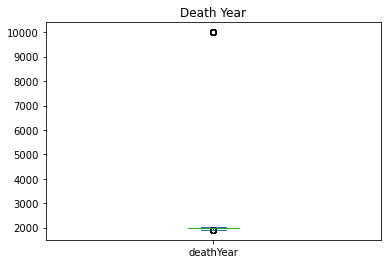

In [13]:
# create a box plot to help with identifying outliers
master_df['deathYear'].plot(kind='box')
plt.title('Death Year')

In [14]:
# locate the position (rows) of the outliers
master_df.loc[master_df['deathYear'] == 9999]

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,firstWHA,lastWHA,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,deathYear
88,anderbi01,NaN,NaN,bill,anderson,NaN,William,Red,72,190,...,<NA>,<NA>,D,1912,12,13,Canada,ON,Tillsonburg,9999
397,bellepe01,NaN,NaN,pete,bellefeuille,NaN,Pierre,The Fleeting Frenchman,70,180,...,<NA>,<NA>,R,1901,10,19,Canada,QC,Trois-Rivieres,9999
430,bentlre01,NaN,NaN,reg,bentley,NaN,Reginald,Scoop,68,155,...,<NA>,<NA>,L,1914,5,3,Canada,SK,Delisle,9999
674,bourcco01,NaN,NaN,conrad,bourcier,NaN,Conrad,NaN,66,155,...,<NA>,<NA>,C,1916,5,28,Canada,QC,Montreal,9999
750,brenndo01,NaN,NaN,doug,brennan,NaN,Douglas Richard,NaN,71,180,...,<NA>,<NA>,D,1905,1,10,Canada,ON,Peterborough,9999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6909,suthema01,NaN,NaN,max,sutherland,NaN,Ronald Maxwell,NaN,70,165,...,<NA>,<NA>,D,1907,2,8,Canada,SK,Grenfell,9999
7057,thompke01,NaN,NaN,ken,thompson,NaN,Kenworthy,NaN,70,160,...,<NA>,<NA>,L,1881,5,29,England,NaN,Oakengates,9999
7060,NaN,thomppe01c,NaN,percy,thompson,NaN,Percy,NaN,<NA>,<NA>,...,<NA>,<NA>,NaN,<NA>,<NA>,<NA>,NaN,NaN,NaN,9999
7159,trembni01,NaN,NaN,nils,tremblay,NaN,Louis Nil,NaN,69,170,...,<NA>,<NA>,C,1923,7,26,Canada,QC,Matane,9999


This is showing that there are 93 observations with death dates set in the year 9999. I was planning on deleting a single outlier, but it is clear this date was used as a "missing data" placeholder to some extent. Rather than deleting 93 rows, I will set the death dates of 9999 to a NaN value instead. 

In [15]:
# replace death year of 9999 with NaN values
master_df['deathYear'] = master_df['deathYear'].replace({9999: np.nan})

In [16]:
# double check that the death year of 9999 no longer has value in the data frame
master_df.loc[master_df['deathYear'] == 9999]

,playerID,coachID,hofID,firstName,lastName,nameNote,nameGiven,nameNick,height,weight,...,firstWHA,lastWHA,pos,birthYear,birthMon,birthDay,birthCountry,birthState,birthCity,deathYear


Text(0.5, 1.0, 'Death Year')

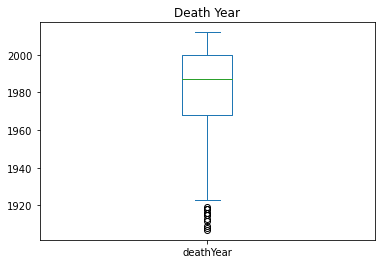

In [17]:
# also check visually that the outliers no longer exist
master_df['deathYear'].plot(kind='box')
plt.title('Death Year')

In [18]:
master_df.describe()

,height,weight,internetHockeyID,firstNHL,lastNHL,firstWHA,lastWHA,birthYear,birthMon,birthDay,deathYear
count,7334.000000,7336.000000,7125.000000,6851.000000,6851.000000,903.000000,903.000000,7543.000000,7506.000000,7504.000000,1227.000000
mean,71.904418,189.503953,18159.395930,1979.898555,1985.173551,1974.256921,1975.746401,1955.170091,6.056088,15.605144,1982.810106
std,2.328650,18.341611,22852.778006,24.150092,24.359206,2.123774,1.947460,26.379075,3.434267,8.917103,20.849197
min,63.000000,125.000000,45.000000,1917.000000,1917.000000,1972.000000,1972.000000,1841.000000,1.000000,1.000000,1907.000000
25%,70.000000,178.000000,3339.000000,1968.000000,1974.000000,1972.000000,1974.000000,1943.000000,3.000000,8.000000,1968.000000
50%,72.000000,190.000000,7500.000000,1985.000000,1991.000000,1974.000000,1976.000000,1961.000000,6.000000,15.000000,1987.000000
75%,73.000000,200.000000,23463.000000,1999.000000,2006.000000,1976.000000,1978.000000,1975.000000,9.000000,23.000000,2000.000000
max,81.000000,265.000000,118280.000000,2011.000000,2011.000000,1978.000000,1978.000000,1993.000000,12.000000,31.000000,2012.000000


There is still some discrepency with death year, but the boxplot looks much better. Notice the earliest recorded death date is 1907, but the earliest WHA or NHL is in 1917. At this point, I will proceed with caution. If the early outliers impact results, they can still be removed. 

# Milestone 3: Cleaning Website Data

In [19]:
#load libraries
from bs4 import BeautifulSoup
import pandas as pd

In [20]:
# set the file destination, read, and close the web source
fd = open("List of NHL statistical leaders - Wikipedia.html", encoding='latin-1')
soup = BeautifulSoup(fd)
fd.close()

In [21]:
# use find-all to extract the content from the table tag, then find the length
all_tables = soup.find_all("table")
print("There are", len(all_tables), 'tables')

There are 7 tables


In [22]:
#attempting to look for the "right table"
all_tables

[<table class="box-More_citations_needed plainlinks metadata ambox ambox-content ambox-Refimprove" role="presentation"><tbody><tr><td class="mbox-image"><div class="mbox-image-div"><a class="image" href="https://en.wikipedia.org/wiki/File:Question_book-new.svg"><img alt="" data-file-height="399" data-file-width="512" decoding="async" height="39" src="./List of NHL statistical leaders - Wikipedia_files/Question_book-new.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/75px-Question_book-new.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/100px-Question_book-new.svg.png 2x" width="50"/></a></div></td><td class="mbox-text"><div class="mbox-text-span">This article <b>needs additional citations for <a href="https://en.wikipedia.org/wiki/Wikipedia:Verifiability" title="Wikipedia:Verifiability">verification</a></b>.<span class="hide-when-compact"> Please help <a class="external text" href="https://en.wikipedia.org/w/index

In [23]:
# parse a table from the correct class
data_table = soup.find("table", {"class": 'wikitable sortable jquery-tablesorter'})

In [24]:
#create a list from the html source
html_df=pd.read_html(str(data_table))

# convert list to dataframe
html_df=pd.DataFrame(html_df[0])
html_df.head()

,Rank,Name,Team(s),GP,Pts,PPG
0,1,Wayne Gretzky,"EDM, LAK, STL, NYR",1487,2857,1.92
1,2,Jaromir Jagr,"PIT, WSH, NYR, PHI, DAL, BOS, NJD, FLA, CGY",1733,1921,1.11
2,3,Mark Messier,"EDM, NYR, VAN",1756,1887,1.07
3,4,Gordie Howe,"DET, HFD",1767,1850,1.05
4,5,Ron Francis,"HFD, PIT, CAR, TOR",1731,1798,1.04


In [25]:
html_df.dtypes

Rank         int64
Name        object
Team(s)     object
GP           int64
Pts          int64
PPG        float64
dtype: object

## Data Cleaning: Step 1

GP and PPG were not quickly recognizeable for a non-hockey fan. I will change the name of the column to an more natural title. Also, having parenthesis in a title makes it hard to work with. I will change the name of the column Team(s) as well. 

In [26]:
# Rename column headers and confirm that changes were applied correctly
html_df.rename(columns = {'GP':'gamesPlayed'}, inplace = True)
html_df.rename(columns = {'PPG':'ptsperGame'}, inplace = True)
html_df.rename(columns = {'Team(s)':'Teams'}, inplace = True)
html_df.head(3)

,Rank,Name,Teams,gamesPlayed,Pts,ptsperGame
0,1,Wayne Gretzky,"EDM, LAK, STL, NYR",1487,2857,1.92
1,2,Jaromir Jagr,"PIT, WSH, NYR, PHI, DAL, BOS, NJD, FLA, CGY",1733,1921,1.11
2,3,Mark Messier,"EDM, NYR, VAN",1756,1887,1.07


## Data Cleaning: Step 2

All names should be converted into lowercase for easier merging of data. 

In [27]:
# lowercase columns, and check first 3 rows to check that changes were applied
html_df['Name'] = html_df['Name'].str.lower()
html_df.head(3)

,Rank,Name,Teams,gamesPlayed,Pts,ptsperGame
0,1,wayne gretzky,"EDM, LAK, STL, NYR",1487,2857,1.92
1,2,jaromir jagr,"PIT, WSH, NYR, PHI, DAL, BOS, NJD, FLA, CGY",1733,1921,1.11
2,3,mark messier,"EDM, NYR, VAN",1756,1887,1.07


## Data Cleaning: Step 3

The master dataframe has two columns for names called firstName and lastName. I will split the Name column into two columns to match the master dataframe.

In [28]:
# Split the names into firstName and lastName to match the master dataframe
# Confirm the columns were added
html_df[['firstName','lastName']] = html_df.Name.str.split(expand=True)
html_df.head(3)

,Rank,Name,Teams,gamesPlayed,Pts,ptsperGame,firstName,lastName
0,1,wayne gretzky,"EDM, LAK, STL, NYR",1487,2857,1.92,wayne,gretzky
1,2,jaromir jagr,"PIT, WSH, NYR, PHI, DAL, BOS, NJD, FLA, CGY",1733,1921,1.11,jaromir,jagr
2,3,mark messier,"EDM, NYR, VAN",1756,1887,1.07,mark,messier


## Data Cleaning: Step 4

The master dataframe does not include a full name column. I will drop the name column. 

In [29]:
# drop the name column and confirm the column was dropped
html_df = html_df.drop(columns=['Name'])
html_df.head(3)

,Rank,Teams,gamesPlayed,Pts,ptsperGame,firstName,lastName
0,1,"EDM, LAK, STL, NYR",1487,2857,1.92,wayne,gretzky
1,2,"PIT, WSH, NYR, PHI, DAL, BOS, NJD, FLA, CGY",1733,1921,1.11,jaromir,jagr
2,3,"EDM, NYR, VAN",1756,1887,1.07,mark,messier


## Data Cleaning: Step 5

I would like to do something about having multiple names under teams. I will start by converting the object to a string. It would be nice to add a column stating how many teams they played for, but I have not yet figured out how to do this. 

In [30]:
# change the Teams Column into a string
html_df["Teams"] = html_df["Teams"].astype(str)
html_df.head(3)

,Rank,Teams,gamesPlayed,Pts,ptsperGame,firstName,lastName
0,1,"EDM, LAK, STL, NYR",1487,2857,1.92,wayne,gretzky
1,2,"PIT, WSH, NYR, PHI, DAL, BOS, NJD, FLA, CGY",1733,1921,1.11,jaromir,jagr
2,3,"EDM, NYR, VAN",1756,1887,1.07,mark,messier


## Ethical Implications

The cleaning of this particular html data set has minor implications. When working on data that includes real people, it is important to keep data honest. In this data set, there were no missing values that needed to be replaced with mean or median values. All player names were simply split and lowercased, but in no other way changed. I think the largest ethical impact is that this data source came from wikipedia, which can be publicly edited and therefore not accurate in the first place. 

# Milestone 4: Connecting to an API/Pulling in the Data and Cleaning/Formatting

In [31]:
# load libraries needed for working with API data
import urllib.request, urllib.parse, urllib.error
import json
import requests

In [32]:
serviceurl = "https://records.nhl.com/site/api"
recordslookup = "/milestone-1000-point-career"

In [33]:
url = serviceurl + recordslookup
url = requests.get("https://records.nhl.com/site/api/milestone-1000-point-career")

In [34]:
print(url.status_code)

200


In [35]:
player_dict = url.json()
player_dict['data']

[{'id': {'gameId': 1992020726, 'skaterId': 8444945},
  'activePlayer': 0,
  'ageInDaysForYear': 143,
  'ageInYears': 32,
  'careerAssists': 601,
  'careerGoals': 498,
  'careerPoints': 1099,
  'gameDate': '1993-02-22T00:00:00',
  'gameId': 1992020726,
  'goalieFirstName': 'Kirk',
  'goalieId': 8449474,
  'goalieLastName': 'McLean',
  'homeScore': 1,
  'homeTeamId': 23,
  'homeTriCode': 'VAN',
  'seasonId': 19921993,
  'skaterCareerGamesPlayed': 1129,
  'skaterFirstName': 'Glenn',
  'skaterGamesPlayed': 954,
  'skaterId': 8444945,
  'skaterLastName': 'Anderson',
  'skaterTeamId': 10,
  'skaterTeamName': 'Toronto Maple Leafs',
  'typeOfPoint': 'G',
  'visitorScore': 8,
  'visitorTeamId': 10,
  'visitorTriCode': 'TOR'},
 {'id': {'gameId': 1995021020, 'skaterId': 8445000},
  'activePlayer': 0,
  'ageInDaysForYear': 191,
  'ageInYears': 32,
  'careerAssists': 698,
  'careerGoals': 640,
  'careerPoints': 1338,
  'gameDate': '1996-04-07T00:00:00',
  'gameId': 1995021020,
  'goalieFirstName': 

In [36]:
player_df = pd.DataFrame.from_dict(player_dict['data'])
player_df.head(3)

,id,activePlayer,ageInDaysForYear,ageInYears,careerAssists,careerGoals,careerPoints,gameDate,gameId,goalieFirstName,...,skaterFirstName,skaterGamesPlayed,skaterId,skaterLastName,skaterTeamId,skaterTeamName,typeOfPoint,visitorScore,visitorTeamId,visitorTriCode
0,"{'gameId': 1992020726, 'skaterId': 8444945}",0,143,32,601,498,1099,1993-02-22T00:00:00,1992020726,Kirk,...,Glenn,954,8444945,Anderson,10,Toronto Maple Leafs,G,8,10,TOR
1,"{'gameId': 1995021020, 'skaterId': 8445000}",0,191,32,698,640,1338,1996-04-07T00:00:00,1995021020,Mike,...,Dave,998,8445000,Andreychuk,1,New Jersey Devils,G,2,3,NYR
2,"{'gameId': 1972020112, 'skaterId': 8445240}",0,181,37,813,556,1369,1972-11-09T00:00:00,1972020112,Denis,...,Johnny,1144,8445240,Bucyk,6,Boston Bruins,G,3,17,DET


In [37]:
player_df.columns

Index(['id', 'activePlayer', 'ageInDaysForYear', 'ageInYears', 'careerAssists',
       'careerGoals', 'careerPoints', 'gameDate', 'gameId', 'goalieFirstName',
       'goalieId', 'goalieLastName', 'homeScore', 'homeTeamId', 'homeTriCode',
       'seasonId', 'skaterCareerGamesPlayed', 'skaterFirstName',
       'skaterGamesPlayed', 'skaterId', 'skaterLastName', 'skaterTeamId',
       'skaterTeamName', 'typeOfPoint', 'visitorScore', 'visitorTeamId',
       'visitorTriCode'],
      dtype='object')

## Data Cleaning: Step 1

Drop unnecessary columns.

In [38]:
#drop columns that do not contain value for futuremerging
player_df = player_df.drop(columns=['id', 'ageInDaysForYear', 'gameDate', 'gameId', 
                                    'typeOfPoint', 'visitorScore', 'visitorTeamId', 'visitorTriCode'])

In [39]:
#confirm that the columns are gone
player_df.columns

Index(['activePlayer', 'ageInYears', 'careerAssists', 'careerGoals',
       'careerPoints', 'goalieFirstName', 'goalieId', 'goalieLastName',
       'homeScore', 'homeTeamId', 'homeTriCode', 'seasonId',
       'skaterCareerGamesPlayed', 'skaterFirstName', 'skaterGamesPlayed',
       'skaterId', 'skaterLastName', 'skaterTeamId', 'skaterTeamName'],
      dtype='object')

## Data Cleaning: Step 2


All names should be converted into lowercase for easier merging of data. 

In [40]:
# lowercase columns, and check first 3 rows to check that changes were applied
player_df['goalieFirstName'] = player_df['goalieFirstName'].str.lower()
player_df['goalieLastName'] = player_df['goalieLastName'].str.lower()
player_df['skaterFirstName'] = player_df['skaterFirstName'].str.lower()
player_df['skaterLastName'] = player_df['skaterLastName'].str.lower()
player_df.head(3)

,activePlayer,ageInYears,careerAssists,careerGoals,careerPoints,goalieFirstName,goalieId,goalieLastName,homeScore,homeTeamId,homeTriCode,seasonId,skaterCareerGamesPlayed,skaterFirstName,skaterGamesPlayed,skaterId,skaterLastName,skaterTeamId,skaterTeamName
0,0,32,601,498,1099,kirk,8449474.0,mclean,1,23,VAN,19921993,1129,glenn,954,8444945,anderson,10,Toronto Maple Leafs
1,0,32,698,640,1338,mike,8450833.0,richter,4,1,NJD,19951996,1639,dave,998,8445000,andreychuk,1,New Jersey Devils
2,0,37,813,556,1369,denis,8449866.0,dejordy,8,6,BOS,19721973,1540,johnny,1144,8445240,bucyk,6,Boston Bruins


## Data Cleaning: Step 3


Check data types and make conversions if it will help readability.

In [41]:
#check data types
player_df.dtypes

activePlayer                 int64
ageInYears                   int64
careerAssists                int64
careerGoals                  int64
careerPoints                 int64
goalieFirstName             object
goalieId                   float64
goalieLastName              object
homeScore                    int64
homeTeamId                   int64
homeTriCode                 object
seasonId                     int64
skaterCareerGamesPlayed      int64
skaterFirstName             object
skaterGamesPlayed            int64
skaterId                     int64
skaterLastName              object
skaterTeamId                 int64
skaterTeamName              object
dtype: object

In [42]:
# Understand missing values
player_df['goalieId'].isnull().value_counts()

False    90
True      7
Name: goalieId, dtype: int64

In [43]:
# change goalieId from a float to an integer
# Note: .astype(int) cannot handle missing values while .astype('Int64') can
player_df['goalieId'] = player_df['goalieId'].astype('Int64')
player_df['goalieId'].head(3)

0    8449474
1    8450833
2    8449866
Name: goalieId, dtype: Int64

## Data Cleaning: Step 4


Rename a column for clarity

In [44]:
player_df.rename(columns = {'ageInYears':'skaterAge', 'skaterLastName':'lastName'}, inplace = True)
player_df.columns

Index(['activePlayer', 'skaterAge', 'careerAssists', 'careerGoals',
       'careerPoints', 'goalieFirstName', 'goalieId', 'goalieLastName',
       'homeScore', 'homeTeamId', 'homeTriCode', 'seasonId',
       'skaterCareerGamesPlayed', 'skaterFirstName', 'skaterGamesPlayed',
       'skaterId', 'lastName', 'skaterTeamId', 'skaterTeamName'],
      dtype='object')

## Data Cleaning: Step 5


In [45]:
player_df = player_df.assign(averagePPG = player_df.careerPoints / player_df.skaterCareerGamesPlayed)
player_df.head(3)

,activePlayer,skaterAge,careerAssists,careerGoals,careerPoints,goalieFirstName,goalieId,goalieLastName,homeScore,homeTeamId,homeTriCode,seasonId,skaterCareerGamesPlayed,skaterFirstName,skaterGamesPlayed,skaterId,lastName,skaterTeamId,skaterTeamName,averagePPG
0,0,32,601,498,1099,kirk,8449474,mclean,1,23,VAN,19921993,1129,glenn,954,8444945,anderson,10,Toronto Maple Leafs,0.973428
1,0,32,698,640,1338,mike,8450833,richter,4,1,NJD,19951996,1639,dave,998,8445000,andreychuk,1,New Jersey Devils,0.816351
2,0,37,813,556,1369,denis,8449866,dejordy,8,6,BOS,19721973,1540,johnny,1144,8445240,bucyk,6,Boston Bruins,0.888961


## Ethical Implications

On this data set, there was a lot of information that was deleted. Sometimes looking at data with less context can lead to interpretation errors. Since we are again dealing with real people, we need to make sure to keep the data honest and accurate. All names were lowercased, which should have no eithical impacts. There was a column added that human error could impact if not calculated correctly. This would result in producing false data. 

# Milestone 5: Merging the Data and Storing in a Database/Visualizing Data

## Create Database and Merge Dataframes

In [46]:
# note the sizes of the original dataframes
print('rows, columns')
print('-'*15)
print('flat file:', master_df.shape)
print('HTML data:', html_df.shape)
print('API data:', player_df.shape)

rows, columns
---------------
flat file: (7761, 26)
HTML data: (50, 7)
API data: (97, 20)


In [47]:
# import database library
import sqlite3
from sqlalchemy import create_engine


#create a connection
conn = sqlite3.connect('hockey.db')

In [48]:
# Write records stored in a DataFrame to a SQL database (flat file)
master_df.to_sql('flatfile', con=conn, if_exists='append')

7761

In [49]:
# Write records stored in a DataFrame to a SQL database (html data)
html_df.to_sql('websitedata', con=conn, if_exists='append')

50

In [50]:
# Write records stored in a DataFrame to a SQL database (api data)
player_df.to_sql('apidata', con=conn, if_exists='append')

97

In [51]:
# close the connection
conn.close()

In [52]:
# merge the flat file and HTML data based on last name
merged_dfs = pd.merge(master_df, html_df, on=['lastName', 'lastName'])

In [53]:
# merge the merged dataframe and the api data frame based on last name
merged_dfs = pd.merge(merged_dfs, player_df, on=['lastName', 'lastName'])

In [54]:
# Write records stored in a DataFrame to a SQL database (merged data)
conn = sqlite3.connect('hockey.db')
merged_dfs.to_sql('mergedfile', con=conn, if_exists='append')
conn.close()

In [55]:
# preview the new dataframe
merged_dfs.head()

,playerID,coachID,hofID,firstName_x,lastName,nameNote,nameGiven,nameNick,height,weight,...,homeTeamId,homeTriCode,seasonId,skaterCareerGamesPlayed,skaterFirstName,skaterGamesPlayed,skaterId,skaterTeamId,skaterTeamName,averagePPG
0,andreda01,NaN,NaN,dave,andreychuk,NaN,David John,Chukie/Octopus,76,220,...,1,NJD,19951996,1639,dave,998,8445000,1,New Jersey Devils,0.816351
1,belivje01,NaN,belivje01h,jean,beliveau,NaN,Jean Arthur,Le Gros Bill,75,205,...,17,DET,19671968,1125,jean,911,8445408,8,Montréal Canadiens,1.083556
2,belivma01,NaN,NaN,marcel,beliveau,NaN,Marcel,NaN,<NA>,<NA>,...,17,DET,19671968,1125,jean,911,8445408,8,Montréal Canadiens,1.083556
3,bourqch01,NaN,NaN,chris,bourque,NaN,NaN,NaN,68,181,...,6,BOS,19911992,1612,ray,933,8445621,6,Boston Bruins,0.979529
4,bourqcl01,NaN,NaN,claude,bourque,NaN,Claude Hennessey,NaN,66,140,...,6,BOS,19911992,1612,ray,933,8445621,6,Boston Bruins,0.979529


In [56]:
# get more information on merged dataframe before creating visualizations
merged_dfs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 0 to 133
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   playerID                 133 non-null    object 
 1   coachID                  12 non-null     object 
 2   hofID                    40 non-null     object 
 3   firstName_x              134 non-null    object 
 4   lastName                 134 non-null    object 
 5   nameNote                 1 non-null      object 
 6   nameGiven                120 non-null    object 
 7   nameNick                 41 non-null     object 
 8   height                   128 non-null    Int64  
 9   weight                   128 non-null    Int64  
 10  shootCatch               125 non-null    object 
 11  legendsID                119 non-null    object 
 12  internetHockeyID         123 non-null    Int64  
 13  hrefID                   127 non-null    object 
 14  firstNHL                 1

## Visualizations

### 1. Scatterplot comparing heights and weights

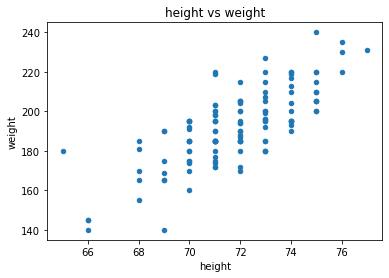

In [57]:
# Compare height against weight in a scatterplot
merged_dfs.plot.scatter('height', 'weight', title= "height vs weight")
plt.show()

### 2. Histogram describing players' first NHL year

In [58]:
# Fill null values in first NHL year with the average year
merged_dfs['firstNHL'].fillna(int(merged_dfs['firstNHL'].mean()), inplace=True)

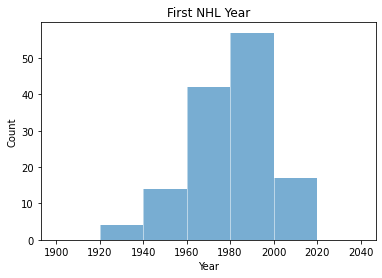

In [59]:
# Create a histogram with set bin widths adding x labels, y labels, and a title
plt.hist(merged_dfs['firstNHL'], bins=[1900, 1920, 1940, 1960, 1980, 2000, 2020, 2040], label='First NHL Year', alpha=.6)
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('First NHL Year')
plt.grid(color='white', lw = 0.5, axis='x')
plt.show()

### 3. Denistiy Plot describing the probability of a player starting in the NHL during different years (based on the players in our merged records dataframe)

In [60]:
# load seaborn library for visualizations
import seaborn as sns

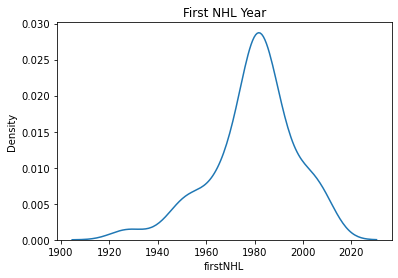

In [61]:
# Create a density plot that shows the probability of a player starting the NHL during different years
sns.kdeplot(merged_dfs['firstNHL'])
plt.title('First NHL Year')
plt.show()

### 4. Boxplot of Career Points

Text(0.5, 1.0, 'Career Points')

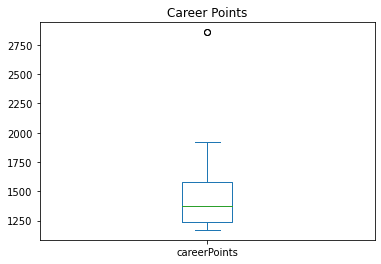

In [62]:
# also check visually that the outliers no longer exist
merged_dfs['careerPoints'].plot(kind='box')
plt.title('Career Points')

### 5. Scatterplot comparing games played and career goals

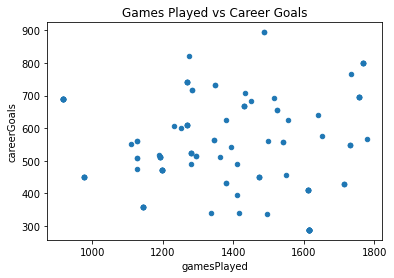

In [63]:
# Compare height against weight in a scatterplot
merged_dfs.plot.scatter('gamesPlayed', 'careerGoals', title= "Games Played vs Career Goals")
plt.show()

## Summary

For this project I was able to handle data from different sources including flat files, HTML, and APIs that housed data describing NHL players and records. I found it challenging to find data that was large enough to be able to merge at the end. For example, my original flat file began with 7,761 rows. When merging was complete, the final dataframe decreased to a total of 134 rows. 

I was introduced to many new tasks through this project that I found extremely helpful in the successive DSC 550 course. Some of the key skills include:
-	Opening and transforming data into a pandas data frame
-	Detecting and replacing outliers
-	Renaming columns
-	Removing unnecessary data
-	Reformatting data types
-	Basic visualization techniques
-	Introduction to SQL

This was also the first time that we were introduced to extracting data from HTML sources. I will need to continue to practice with HTML and API sources. However, I have grown tremendously in my ability to work with flat files and pandas dataframes. 

As an emerging data scientist, I will need to continue to be careful with the results of my work. Cleansing data can introduce additional human errors into a project. This project was based on real athletes’ statistics along with other personal information. It is immensely important that I am cautious when manipulating data so that facts and figures are not skewed. Visualizations should represent the data in a manner that will not get misinterpreted by my viewers/clients. Also, I should have spent more time at the beginning ensuring that my data was being pulled from legitimate sources. I believe that the data frame and results produced at the end of this project represent honest and accurate information. 
